In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from PPO import PPO

env = gym.make('CartPole-v1')
env = gym.make('LunarLander-v2')
env.seed(10)

state_size = env.observation_space.shape[0]
action_size =env.action_space.n

# PPO Settings
update_every = 2000
num_learn = 4
win_condition = 200

# Agent settings
hidden_size=512
epsilon=0.2
entropy_beta=0.01
gamma=0.99
lr=1e-3

agent = PPO(state_size, action_size, hidden_size=hidden_size, epsilon=epsilon, entropy_beta=entropy_beta, gamma=gamma, lr=lr)

def train(n_episodes=2000, max_t=700):
  steps = 0
  scores_deque = deque(maxlen=100)
  scores = []
  average_scores = []
  max_score = -np.Inf

#   agent = PPO(state_size, action_size, hidden_size=hidden_size, epsilon=epsilon, entropy_beta=entropy_beta, gamma=gamma, lr=lr)

  for episode in range(1, n_episodes+1):
    state = env.reset()
    score = 0
    
    for t in range(max_t):
      steps += 1

      action, log_prob = agent.act(torch.FloatTensor(state))
      next_state, reward, done, _ = env.step(action.item())

      agent.mem.add(torch.FloatTensor(state), action, reward, log_prob, done)

      # Update 
      state = next_state
      score += reward

      if steps >= update_every:
        agent.learn(num_learn)
        agent.mem.clear()
        steps = 0

      if done:
        break
    
    # Book Keeping
    scores_deque.append(score)
    scores.append(score)
    average_scores.append(np.mean(scores_deque))
      
    if episode % 10 == 0:
      print("\rEpisode {}	Average Score: {:.2f}	Score: {:.2f}".format(episode, np.mean(scores_deque), score), end="")
    if episode % 100 == 0:
      print("\rEpisode {}	Average Score: {:.2f}".format(episode, np.mean(scores_deque)))   
    
    if np.mean(scores_deque) > win_condition:
      print("\rEnvironment Solved in {} episodes!".format(episode))
      break


  return scores, average_scores

scores, average_scores = train()

Episode 100	Average Score: -252.87	Score: -323.85
Episode 200	Average Score: -104.32	Score: -86.410
Episode 300	Average Score: -40.65	Score: -46.14
Episode 400	Average Score: 0.67	Score: 47.4995
Episode 500	Average Score: 1.99	Score: 36.1086
Episode 600	Average Score: 26.80	Score: 57.3889
Episode 700	Average Score: 45.10	Score: -57.80
Episode 800	Average Score: 56.55	Score: 23.031
Episode 900	Average Score: 67.64	Score: 27.961
Episode 1000	Average Score: 101.69	Score: 179.78
Episode 1100	Average Score: 85.46	Score: 253.332
Episode 1200	Average Score: 119.07	Score: 224.45
Episode 1300	Average Score: 119.98	Score: 65.0294
Episode 1400	Average Score: 146.08	Score: 156.31
Episode 1500	Average Score: 125.33	Score: 232.23
Episode 1600	Average Score: 157.39	Score: 214.24
Episode 1700	Average Score: 153.18	Score: 249.31
Episode 1800	Average Score: 150.13	Score: 157.16
Episode 1900	Average Score: 157.77	Score: 134.67
Episode 2000	Average Score: 163.16	Score: 230.97


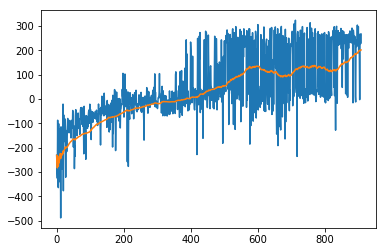

In [3]:
plt.plot(scores)
plt.plot(average_scores)

In [10]:
for episode in range(3):
    state = env.reset()
    score = 0
    input()

    for t in range(700):
        action, log_prob = agent.act(torch.FloatTensor(state))
        next_state, reward, done, _ = env.step(action.item())
        env.render()
        
        score += reward
        
        if done:
            print(score)
            break;
        
        state = next_state

env.close()


220.59598801132688


295.22099514090326
